<a href="https://colab.research.google.com/github/JoeKomo/Machine-Learning/blob/main/Customers_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.2 MB/s 


In [ ]:
#load EDA packages
import numpy as np
import pandas as pd
# pip install neattext (if necessary)
import neattext.functions as nfx
#viz packages
import matplotlib.pyplot as plt
import seaborn as sns
#ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# model selection 
from sklearn.model_selection import cross_val_score
#WARNING
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#loading the dataset

df = pd.read_json('gdrive/My Drive/technical_test_data.json')

In [ ]:
#data
df.head()

,id,Description,tags,created_at,cc_emails,fwd_emails,reply_cc_emails,ticket_cc_emails,fr_escalated,spam,...,priority,requester_id,responder_id,source,company_id,status,subject,association_type,support_email,to_emails
0,0,"- __EMAIL__ Hi , I have just ordered a pair of...","[category-1, missing-items, field-1456]",2020-03-15,[],[],[],[],False,False,...,1,30,304,1,None,5,Customer Request,None,digitalgenius.com,['support@digitalgenius.com']
1,1,I am missing a pair of shoes from my order. Co...,"[missing-items, open-ticket]",2021-01-18,[],[],[],[],False,False,...,1,30,304,1,None,5,Customer Request,None,digitalgenius.com,['support@digitalgenius.com']
2,2,I didn'tget a my order - __EMAIL__,"[category-1, missing-items]",2019-08-01,[],[],[],[],False,False,...,1,30,304,1,None,5,Customer Request,None,digitalgenius.com,['support@digitalgenius.com']
3,3,"Hello, I ordered two __PRODUCTS_NAMES and one ...","[category-1, missing-items, open-ticket, field...",2020-08-27,[],[],[],[],False,False,...,1,30,304,1,None,5,Customer Request,None,digitalgenius.com,['support@digitalgenius.com']
4,4,My shipment never was delivered. The tracking ...,"[category-1, missing-items, open-ticket]",2019-07-21,[],[],[],[],False,False,...,1,30,304,1,None,5,Customer Request,None,digitalgenius.com,['support@digitalgenius.com']


In [ ]:
#checking the number of rows and columns
df.shape

(1433, 22)

In [ ]:
#Checking for missing Value
df.isna().sum()

id                  0
Description         0
tags                0
created_at          0
cc_emails           0
fwd_emails          0
reply_cc_emails     0
ticket_cc_emails    0
fr_escalated        0
spam                0
email_config_id     0
group_id            0
priority            0
requester_id        0
responder_id        0
source              0
company_id          0
status              0
subject             0
association_type    0
support_email       0
to_emails           0
dtype: int64

In [ ]:
# To see the Nature of the  request
df.tags.unique

<bound method Series.unique of 0                 [category-1, missing-items, field-1456]
1                            [missing-items, open-ticket]
2                             [category-1, missing-items]
3       [category-1, missing-items, open-ticket, field...
4                [category-1, missing-items, open-ticket]
                              ...                        
1428       [category-1, cancel-subscription, open-ticket]
1429                    [category-1, cancel-subscription]
1430            [category-1, ticket, cancel-subscription]
1431       [category-1, cancel-subscription, open-ticket]
1432    [category-1, adverse-effect, open-ticket, fiel...
Name: tags, Length: 1433, dtype: object>

In [ ]:
#A function for a full description and nature of the request
def cust_complaint(id):
    return (df["Description"][id]), (df["tags"][id])

In [ ]:
#showing the full description and tags(i.e, category of the request), for a random customer
cust_complaint(5)

("I ordered a pair of __PRODUCTS_NAMES__ shoes, but I never received a confirmation email. Makes me think I didn't complete the purchase process somehow?? Can you confirm that I placed an order?\n __NAME__ - __EMAIL__",
 ['missing-items', 'field-1456'])

In [ ]:
cust_complaint(23)

('I reported a missing delivery yesterday and received an email assuring me that the package delivery would be tracked and I would revive an email within 24 hours. As yet I have heard nothing more.',
 ['category-1', 'where-is-my-order'])

# EDA

Data Cleaning for Visualization Purpose

In [ ]:
df.tags[5]

['missing-items', 'field-1456']

The main purpose of tags[5] is missing-items

In [ ]:
#Bringing out main purpose in tags
Value =[]
for g in df.id:
  for item in df.tags[g]:
     Value.append(item)

In [ ]:
#showing some category in the value
Value[24:35]

['open-ticket',
 'field-1456',
 'category-1',
 'missing-items',
 'category-1',
 'missing-items',
 'field-1456',
 'missing-items',
 'field-1456',
 'category-1',
 'missing-items']

##### Open-tickets, field-1456, ticket, category-1 will be removed in the value(tags list) in order to see the main purpose of the message

In [ ]:
Status=[]
for item in Value:
   if item in (["open-ticket","ticket","category-1", "field-1456"]):
      Status
   else:
       Status.append(item)

In [ ]:
#showing some item in the status
Status[15:25]

['missing-items',
 'missing-items',
 'missing-items',
 'missing-items',
 'where-is-my-order',
 'where-is-my-order',
 'where-is-my-order',
 'where-is-my-order',
 'where-is-my-order',
 'where-is-my-order']

In [ ]:
d=np.array(Status)
print('There are', len(set(Status)), 'Distinct Requests')

There are 32 Distinct Requests


In [ ]:
#creating a dataframe for tag
tag =pd.DataFrame(d)
tag.sample(4)

,0
1014,promocode-not-working
289,warranty-claim-status
229,order-confirmation-not-received
35,where-is-my-order


This is to show that the data still retains its total number(1433) but the main point has been obtained from it

In [ ]:
tag.shape

(1433, 1)

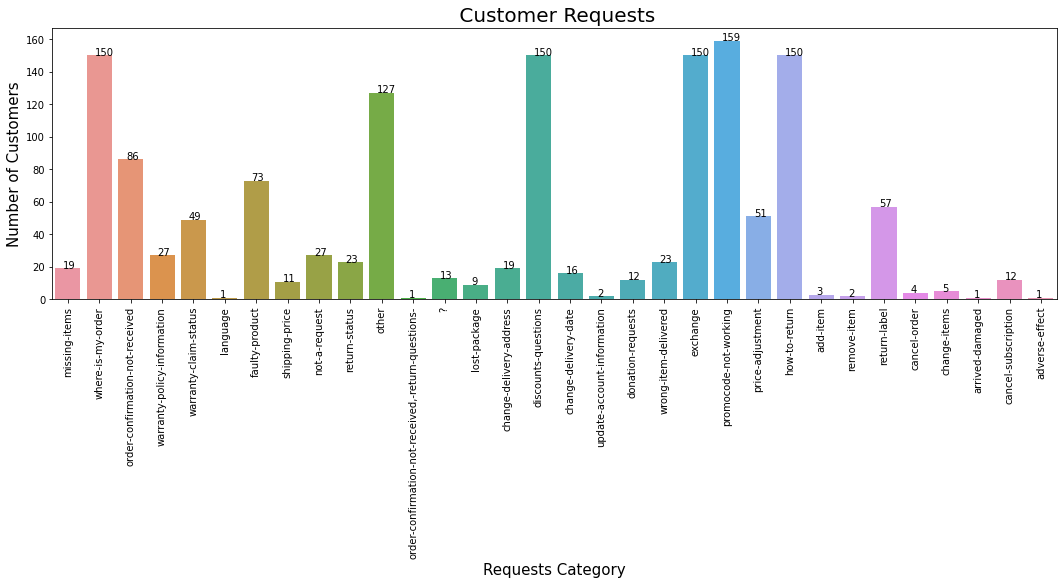

In [ ]:
#visualizing the Customers' Requests
fig,ax = plt.subplots(figsize = (18,5))
sns.countplot(tag[0], data = tag)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title(" Customer Requests",fontsize = 20)
plt.xlabel("Requests Category", fontsize = 15)
plt.xticks(rotation = 90) 
plt.ylabel("Number of Customers",fontsize = 15)
plt.show()

## INSIGHT

'PromoCode not working' tends to be the most complained with 159 customers', followed by 'where is my order','exchange', 'how to return', 'discount questions' with 150 customers each

In [ ]:
# checking the date
date =pd.DatetimeIndex(df.created_at).year
date.value_counts()

2019    722
2020    664
2021     47
Name: created_at, dtype: int64

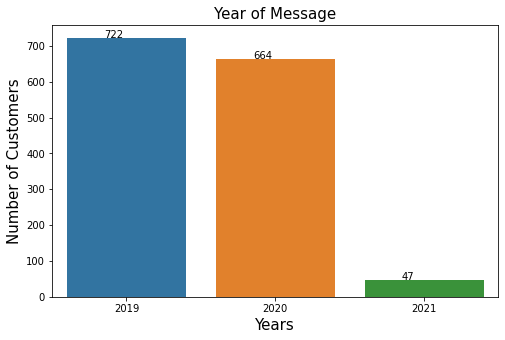

In [ ]:
#visualizing the Customers' Request
fig,ax = plt.subplots(figsize = (8,5))
sns.countplot(date)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title("Year of Message",fontsize = 15)
plt.xlabel("Years",fontsize = 15) 
plt.ylabel("Number of Customers",fontsize = 15)
plt.show()

# INSIGHT
2019 had the highest Number of request

# Data Cleaning for Model Purpose

In [ ]:
#bringing out the target value (is the customer asking for  order status?,where is my ticket?)
target =[]
for g in df.id:
   if "where-is-my-order" in df.tags[g]:
         target.append('Order-status')
   else:
        target.append('Not Order-status')
#merging the target to the dataset
df["target"] = target
df.target.value_counts()

Not Order-status    1283
Order-status         150
Name: target, dtype: int64

#### Note: The total Number of Request that is about Order's status is 150. which is the target variable, this implies Imbalance in the dataset which will be downsided in order to obtained a better accuracy for the model.

# FEATURE ENGINEERING

In [ ]:
#needed columns
df2 = df[['Description', 'target']]
df2.sample(5)

,Description,target
802,I just placed this order and missed the line t...,Not Order-status
749,"Hi, I signed up for your newsletter after purc...",Not Order-status
915,_COMPANY_ Pending request: exchange or return ...,Not Order-status
803,I just received my order item 19.0001 __PRODUC...,Not Order-status
164,Hoping someone can assist - i just checked the...,Order-status


### Text preprocessing
 #### Reduce noise
  + punctuation
  + Special Char
  + Stopwords
#### Chainging to  Lower case
  

In [ ]:
#for different neattest functions
#dir(nfx) 

In [ ]:
#removing stopwords like I, have, and, or, was, is , the etc.
df2['Description']= df2['Description'].apply(nfx.remove_stopwords)

In [ ]:
#removing special characters
df2['Description']= df2['Description'].apply(nfx.remove_special_characters)

In [ ]:
#changing to lower case
df2['Description']= df2['Description'].str.lower()

In [ ]:
#after cleaning
df2['Description'][0]

'email hi ordered pair productname relevant code free company bag new customer received trainers bag sent separately inefficient system oversight kind regards'

In [ ]:
#original data
df['Description'][0]

'- __EMAIL__ Hi , I have just ordered a pair of __PRODUCT_NAME__ and put the relevant code for free __COMPANY__ bag as new customer . I have received trainers but no bag . Will this be sent separately? \n Seems to be an inefficient system, or was this an oversight?\n Kind regards\n __NAME__'

## Downsizing the data for model purpose i.e Dealing with the Imbalance in the dataset

In [ ]:
df2.target.unique()

array(['Not Order-status', 'Order-status'], dtype=object)

In [ ]:
yes= df2[df2['target']=='Order-status']
no = df2[df2['target'] == 'Not Order-status']
yes.shape, no.shape 

((150, 2), (1283, 2))

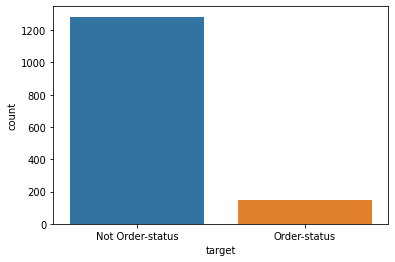

In [ ]:
sns.countplot(x = 'target', data = df2)

### It's obvious there is Imbalance in the data

In [ ]:
#randomly selecting 150 from other dataset that are not order-status
df_no = no.sample(n = 150, random_state = 1)
#merging the yes and no together
df3 = pd.concat([df_no, yes], axis = 0)
df3.head()

,Description,target
283,sent warranty claim form received response ema...,Not Order-status
499,hi productnamess charged amountshipping site s...,Not Order-status
1186,hi purchased jacket hoping use promo code rece...,Not Order-status
418,hello boyfriend ordered hoodie date accidental...,Not Order-status
1049,hi trying use discount code email new10w6jswmt...,Not Order-status


In [ ]:
#the data is balance now
df3.target.value_counts()

Not Order-status    150
Order-status        150
Name: target, dtype: int64

In [ ]:
# shuffling the dataset and resetting the index
df4 = df3.sample(frac=1, random_state = 1).reset_index(drop=True)
df4.head()

,Description,target
0,package showing delivered showed advise packag...,Order-status
1,ordered wrong color child need change email,Not Order-status
2,returned pair 95 pair 9 mens sneakers date bel...,Order-status
3,second time trying reach customer service got ...,Order-status
4,hello prior placing significantly large order ...,Not Order-status


In [ ]:
df4.shape

(300, 2)

# Building Features from the Text
+ convert words to vectors of numbers using Tfidf


In [ ]:
features = df4['Description']
label = df4['target']

In [ ]:
vect =TfidfVectorizer()
X = vect.fit_transform(features)
X

<300x1699 sparse matrix of type '<class 'numpy.float64'>'
	with 5322 stored elements in Compressed Sparse Row format>

In [ ]:
#showing the matrix
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# convert to dataframe
df_vec = pd.DataFrame(X.todense(),columns = vect.get_feature_names())
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0cm,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.148761,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100km,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youname,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
young,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zip,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zur,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Selection
## Using Cross Validation Score to select a best model

In [ ]:
#Logistic regression
log = cross_val_score(LogisticRegression(), X,label)
print('Logistic Regression Accuracies', log)
print('Logistic Regression Average score = ', np.round(log.mean() *100),'%')

Logistic Regression Accuracies [0.83333333 0.88333333 0.81666667 0.86666667 0.9       ]
Logistic Regression Average score =  86.0 %


In [ ]:
#Naive Bayes Classifier
nvb = cross_val_score(MultinomialNB(), X,label)
print('Naive Bayes Classifier Accuracies', nvb)
print('Naive Bayes Classifier Average score = ',np.round(nvb.mean() *100),'%')

Naive Bayes Classifier Accuracies [0.78333333 0.83333333 0.88333333 0.95       0.9       ]
Naive Bayes Classifier Average score =  87.0 %


In [ ]:
#Decision Tree  Classifier
dtc = cross_val_score(DecisionTreeClassifier(), X,label)
print('Decision Tree  Classifier Accuracies', dtc)
print('Decision Tree  Classifier Average score = ',np.round(dtc.mean() *100),'%')

Decision Tree  Classifier Accuracies [0.65       0.86666667 0.71666667 0.83333333 0.81666667]
Decision Tree  Classifier Average score =  78.0 %


In [ ]:
#Random Forest Classifier
rfc = cross_val_score(RandomForestClassifier(n_estimators = 40), X,label)
print('Random Forest  Classifier Accuracies', rfc)
print('Random Forest  Classifier Average score = ',np.round(rfc.mean() *100),'%' )

Random Forest  Classifier Accuracies [0.8        0.86666667 0.83333333 0.91666667 0.88333333]
Random Forest  Classifier Average score =  86.0 %


#### Four Machine Learning classification Models have been tested, with cross validation score, which served them different set of observations five times to study the way the model will behave. The average scores were recorded as well. logistic regression and Naive Bayes Classifier give the best accuracy 86% on an average.  Naive Bayes Classifier will be used for this model, its accuracy is one the best and it has also gained popularity with Texts data.

# Building Model

+ single Approach
   + Separately


In [ ]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,label, test_size = .25, random_state =0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((225, 1699), (75, 1699), (225,), (75,))

In [ ]:
#Naive Bayes Classifier
nvb = MultinomialNB()
nvb = nvb.fit(X_train,y_train)
print('The model accuracy is ' ,(np.round(nvb.score(X_test,y_test)*100)),'%')

The model accuracy is  92.0 %


In [ ]:
#Metrics Purpose
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = nvb.predict(X_test)

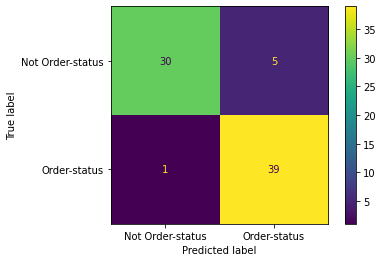

In [ ]:
plot_confusion_matrix(nvb,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

Not Order-status       0.97      0.86      0.91        35
    Order-status       0.89      0.97      0.93        40

        accuracy                           0.92        75
       macro avg       0.93      0.92      0.92        75
    weighted avg       0.92      0.92      0.92        75



### With the above metrics value, The model tends to train well

# Testing the Model with new message

In [ ]:
# testing the model with different message
example= 'I have not gotten my order'

In [ ]:
def message(text):
    vect_data =vect.transform([text])
    vec = vect_data.toarray()
    return nvb.predict(vec)

In [ ]:
message(example)

array(['Order-status'], dtype='<U16')

In [ ]:
message('i want discount')

array(['Not Order-status'], dtype='<U16')

In [ ]:
message('my package is not complete, when will i get the rest')

array(['Order-status'], dtype='<U16')